# Simple Training

Train a single variable to discriminate between input and outputs using the scikit-learn simple NN's

## Settings

In [1]:
n_variables = 4 # Number of data and background varialbes to generate
n_samples = 10000 # Number of samples to generate

center_signal = 2.0 # Where the gaussian for signal should be
center_background = 1.0 # Where the gaussian for background should be

## Setup

In [2]:
import sys
sys.path += ['../abcdlib']
import data_gen

from sklearn.neural_network import MLPClassifier
import seaborn as sns
import pandas as pd

## Generate the data

In [3]:
sig = data_gen.generate_gaussian(n_variables, center_signal, n_samples)
back = data_gen.generate_gaussian(n_variables, center_background, n_samples)

half = int(n_samples/2)

training = data_gen.combine(sig[:half], back[:half])
testing = data_gen.combine(sig[half:], back[half:])

## Train with one output

First, prepare the data for fitting

In [4]:
x_train = training[training.columns[:-1]].values
y_train = training[training.columns[-1]].values

Next, create a simple classifier and then fit it

In [5]:
clf = MLPClassifier(hidden_layer_sizes=(15,))
clf.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(15,))

## Predict

Run the prediction, and plot the probabilities

In [6]:
x_test = testing[testing.columns[:-1]].values
prediction = clf.predict_proba(x_test)

In [7]:
x_results = testing.copy()
x_results['Prediction'] = prediction[:,1]

<AxesSubplot:xlabel='Prediction', ylabel='Count'>

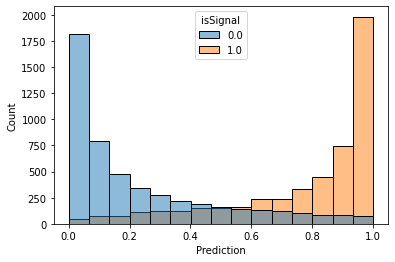

In [8]:
sns.histplot(x_results, x='Prediction', hue='isSignal')